In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate

In [66]:
file_paths_mongo_3nodes = [
    'sanitized/mongo_run_3nodes_workload_50_50.csv',
    'sanitized/mongo_run_3nodes_workload_10_90.csv',
    'sanitized/mongo_run_3nodes_workload_100_0.csv',
    ]

file_paths_redis_3nodes = [
    'sanitized/redis_run_3nodes_workload_50_50.csv',
    'sanitized/redis_run_3nodes_workload_10_90.csv',
    'sanitized/redis_run_3nodes_workload_100_0.csv',
    ]

file_paths_mongo_5nodes = [
    'sanitized/mongo_run_5nodes_workload_50_50.csv',
    'sanitized/mongo_run_5nodes_workload_10_90.csv',
    'sanitized/mongo_run_5nodes_workload_100_0.csv',
    ]

file_paths_redis_5nodes = [
    'sanitized/redis_run_5nodes_workload_50_50.csv',
    'sanitized/redis_run_5nodes_workload_10_90.csv',
    'sanitized/redis_run_5nodes_workload_100_0.csv',
    ]

workload_names = ['50/50 lecture/ecriture', '10/90 lecture/ecriture', '100/0 lecture/ecriture']

data_3nodes = {
    'Workload': [],
    'Mean Throughput (ops/sec)': [],
    'Set': [],
    'Low Throughput (ops/sec)' : [],
    'High Throughput (ops/sec)' : [],
    'READ_AverageLatency(us)': [],
    'READ Latency Low': [],
    'READ Latency High': [],
    'UPDATE_AverageLatency(us)': [],
    'UPDATE Latency Low': [],
    'UPDATE Latency High': []
}

data_5nodes = {
    'Workload': [],
    'Mean Throughput (ops/sec)': [],
    'Set': [],
    'Low Throughput (ops/sec)' : [],
    'High Throughput (ops/sec)' : [],
    'READ_AverageLatency(us)': [],
    'READ Latency Low': [],
    'READ Latency High': [],
    'UPDATE_AverageLatency(us)': [],
    'UPDATE Latency Low': [],
    'UPDATE Latency High': []
}

In [67]:
def load_data(file_paths, set_name, data):
    for file_path, workload_name in zip(file_paths, workload_names):
        df = pd.read_csv(file_path, index_col=0)
        mean_throughput = df.loc['Mean', 'OVERALL_Throughput(ops/sec)']
        low_throughput = df.loc['Confidence Interval Low', 'OVERALL_Throughput(ops/sec)']
        high_throughput = df.loc['Confidence Interval High', 'OVERALL_Throughput(ops/sec)']
        
        data['Workload'].append(workload_name)
        data['Set'].append(set_name)
        
        data['Mean Throughput (ops/sec)'].append(mean_throughput)
        data['Low Throughput (ops/sec)'].append(low_throughput)
        data['High Throughput (ops/sec)'].append(high_throughput)
        
        read_avg_latency = df.loc['Mean', 'READ_AverageLatency(us)']
        low_read = df.loc['Confidence Interval Low', 'READ_AverageLatency(us)']
        high_read = df.loc['Confidence Interval High', 'READ_AverageLatency(us)']
                    
        data['READ_AverageLatency(us)'].append(read_avg_latency)
        data['READ Latency Low'].append(low_read)
        data['READ Latency High'].append(high_read)
        
        if workload_name == '50/50 lecture/ecriture' or workload_name == '10/90 lecture/ecriture':
            update_avg_latency = df.loc['Mean', 'UPDATE_AverageLatency(us)']
            low_update = df.loc['Confidence Interval Low', 'UPDATE_AverageLatency(us)']
            high_update = df.loc['Confidence Interval High', 'UPDATE_AverageLatency(us)']
                        
            data['UPDATE_AverageLatency(us)'].append(update_avg_latency)
            data['UPDATE Latency Low'].append(low_update)
            data['UPDATE Latency High'].append(high_update)

        else:
            data['UPDATE_AverageLatency(us)'].append(0)
            data['UPDATE Latency Low'].append(0)
            data['UPDATE Latency High'].append(0)



In [68]:
# Load data from both sets
load_data(file_paths_mongo_3nodes, 'Set 1', data_3nodes)
load_data(file_paths_redis_3nodes, 'Set 2', data_3nodes)

df_throughput1 = pd.DataFrame(data_3nodes)
df_throughput1['Group'] = 'Group 1'
df_throughput1

,Workload,Mean Throughput (ops/sec),Set,Low Throughput (ops/sec),High Throughput (ops/sec),READ_AverageLatency(us),READ Latency Low,READ Latency High,UPDATE_AverageLatency(us),UPDATE Latency Low,UPDATE Latency High,Group
0,50/50 lecture/ecriture,2779.037578,Set 1,2710.127106,2847.948050,464.381401,433.837259,494.925543,121.301055,91.109202,151.492909,Group 1
1,10/90 lecture/ecriture,3126.058656,Set 1,3039.347250,3212.770063,1581.172119,1435.739941,1726.604297,104.189566,88.116820,120.262313,Group 1
2,100/0 lecture/ecriture,3966.779408,Set 1,3882.371075,4051.187741,190.700700,185.655088,195.746312,0.000000,0.000000,0.000000,Group 1
3,50/50 lecture/ecriture,6176.626296,Set 2,6058.693379,6294.559213,106.202059,103.578231,108.825888,140.390985,136.948528,143.833442,Group 1
4,10/90 lecture/ecriture,5882.366919,Set 2,5785.310640,5979.423199,132.228280,129.213206,135.243354,131.240634,128.795416,133.685852,Group 1
5,100/0 lecture/ecriture,7633.423737,Set 2,7399.804373,7867.043101,94.738700,91.401928,98.075472,0.000000,0.000000,0.000000,Group 1


In [69]:
load_data(file_paths_mongo_5nodes, 'Set 1', data_5nodes)
load_data(file_paths_redis_5nodes, 'Set 2', data_5nodes)

df_throughput2 = pd.DataFrame(data_5nodes)
df_throughput2['Group'] = 'Group 2'
df_throughput2

,Workload,Mean Throughput (ops/sec),Set,Low Throughput (ops/sec),High Throughput (ops/sec),READ_AverageLatency(us),READ Latency Low,READ Latency High,UPDATE_AverageLatency(us),UPDATE Latency Low,UPDATE Latency High,Group
0,50/50 lecture/ecriture,2033.009960,Set 1,1986.234031,2079.785888,750.554268,719.823438,781.285098,96.920163,68.309415,125.530912,Group 2
1,10/90 lecture/ecriture,2033.255696,Set 1,1977.362469,2089.148922,3201.762466,2982.057902,3421.467031,118.470217,103.043483,133.896952,Group 2
2,100/0 lecture/ecriture,3772.504246,Set 1,3692.767705,3852.240788,200.695500,196.579402,204.811598,0.000000,0.000000,0.000000,Group 2
3,50/50 lecture/ecriture,5826.162652,Set 2,5755.396544,5896.928761,104.007487,102.151895,105.863080,163.490893,160.252056,166.729729,Group 2
4,10/90 lecture/ecriture,5250.995181,Set 2,5157.591234,5344.399128,138.377611,134.860530,141.894691,152.830826,149.590058,156.071594,Group 2
5,100/0 lecture/ecriture,7780.589872,Set 2,7580.271333,7980.908411,93.214350,90.545793,95.882907,0.000000,0.000000,0.000000,Group 2


In [70]:
df_3nodes = pd.DataFrame(data_3nodes)
df_5nodes = pd.DataFrame(data_5nodes)

In [71]:
def plot_figure(metric, low_int, high_int, filename):
    max_mongo = []
    max_reddis = []
    
    plt.figure(figsize=(14, 6))
    positions = np.array(range(len(workload_names)))  # [0, 1, 2] for Workload A, B, C

    plt.subplot(1, 2, 1)  # 1 row, 2 cols, subplot 1
    for i, workload in enumerate(workload_names):
        
        # Mongo
        mongo_throughput = df_3nodes[(df_3nodes['Workload'] == workload) & (df_3nodes['Set'] == 'Set 1')][metric].values
        low_yerr_mongo = df_3nodes[(df_3nodes['Workload'] == workload) & (df_3nodes['Set'] == 'Set 1')][low_int].values
        high_yerr_mongo = df_3nodes[(df_3nodes['Workload'] == workload) & (df_3nodes['Set'] == 'Set 1')][high_int].values
        max_mongo.append(max(mongo_throughput))

        plt.bar(positions[i], mongo_throughput, label='Mongo' if i == 0 else "", color='navy', alpha=0.7)
        plt.errorbar(positions[i], mongo_throughput, yerr=[mongo_throughput - low_yerr_mongo, high_yerr_mongo - mongo_throughput], fmt='-', color='orchid')  
        
        
        # Redis
        redis_throughput = df_3nodes[(df_3nodes['Workload'] == workload) & (df_3nodes['Set'] == 'Set 2')][metric].values
        low_yerr_redis = df_3nodes[(df_3nodes['Workload'] == workload) & (df_3nodes['Set'] == 'Set 2')][low_int].values
        high_yerr_redis = df_3nodes[(df_3nodes['Workload'] == workload) & (df_3nodes['Set'] == 'Set 2')][high_int].values
        
        max_reddis.append(max(redis_throughput))

        plt.bar(positions[i], redis_throughput, label='Redis' if i == 0 else "", color='grey', alpha=0.5)
        plt.errorbar(positions[i], redis_throughput, yerr=[redis_throughput - low_yerr_redis, high_yerr_redis - redis_throughput], fmt='-', color='red')  
  
    if metric == "Mean Throughput (ops/sec)" : 
        plt.ylim((0, 8000))
    elif metric == "READ_AverageLatency(us)" : 
        plt.ylim((0, 3500)) 
    elif metric == "UPDATE_AverageLatency(us)" : 
        plt.ylim((0, 180)) 
        
    plt.title("3 Nodes")
    plt.xticks(positions, workload_names)
    plt.ylabel(metric)
    plt.legend()  
    
    # Plotting for 5 nodes
    plt.subplot(1, 2, 2)  # 1 row, 2 cols, subplot 2
    for i, workload in enumerate(workload_names):
        # Mongo
        mongo_throughput = df_5nodes[(df_5nodes['Workload'] == workload) & (df_5nodes['Set'] == 'Set 1')][metric].values
        low_yerr_mongo = df_5nodes[(df_5nodes['Workload'] == workload) & (df_5nodes['Set'] == 'Set 1')][low_int].values
        high_yerr_mongo = df_5nodes[(df_5nodes['Workload'] == workload) & (df_5nodes['Set'] == 'Set 1')][high_int].values
        max_mongo.append(max(mongo_throughput))
        
        plt.bar(positions[i], mongo_throughput, color='navy', alpha=0.7)
        plt.errorbar(positions[i], mongo_throughput, yerr=[mongo_throughput - low_yerr_mongo, high_yerr_mongo - mongo_throughput], fmt='-', color='orchid')  
    
        
        # Redis
        redis_throughput = df_5nodes[(df_5nodes['Workload'] == workload) & (df_5nodes['Set'] == 'Set 2')][metric].values
        low_yerr_redis = df_5nodes[(df_5nodes['Workload'] == workload) & (df_5nodes['Set'] == 'Set 2')][low_int].values
        high_yerr_redis = df_5nodes[(df_5nodes['Workload'] == workload) & (df_5nodes['Set'] == 'Set 2')][high_int].values
        max_reddis.append(max(redis_throughput))
        
        plt.bar(positions[i], redis_throughput, color='grey', alpha=0.5)
        plt.errorbar(positions[i], redis_throughput, yerr=[redis_throughput - low_yerr_redis, high_yerr_redis - redis_throughput], fmt='-', color='red') 
    
    if metric == "Mean Throughput (ops/sec)" : 
        plt.ylim((0, 8000))
    elif metric == "READ_AverageLatency(us)" : 
        plt.ylim((0, 3500)) 
    elif metric == "UPDATE_AverageLatency(us)" : 
        plt.ylim((0, 180)) 
        
    plt.title('5 Nodes')
    plt.xticks(positions, workload_names)
    plt.suptitle(metric)
    
    plt.tight_layout()
    plt.savefig(f'figures/{filename}')
    plt.show()


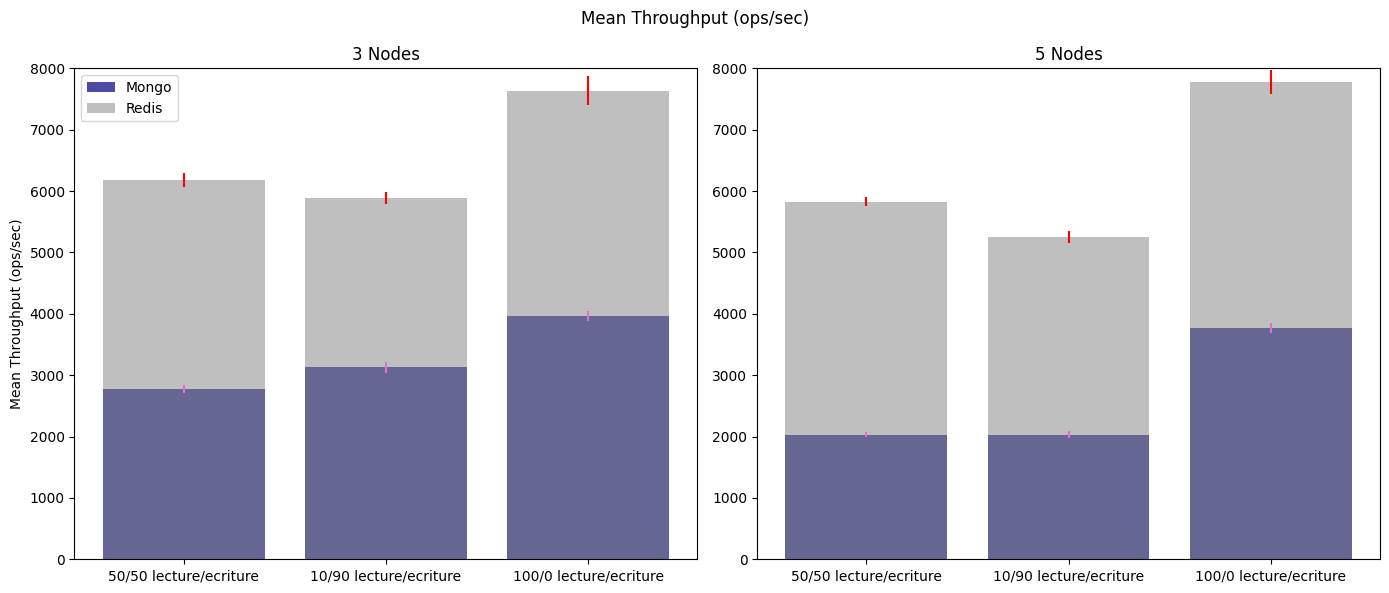

In [72]:
plot_figure(metric="Mean Throughput (ops/sec)", low_int='Low Throughput (ops/sec)',high_int="High Throughput (ops/sec)", filename="mean-throughput.png")

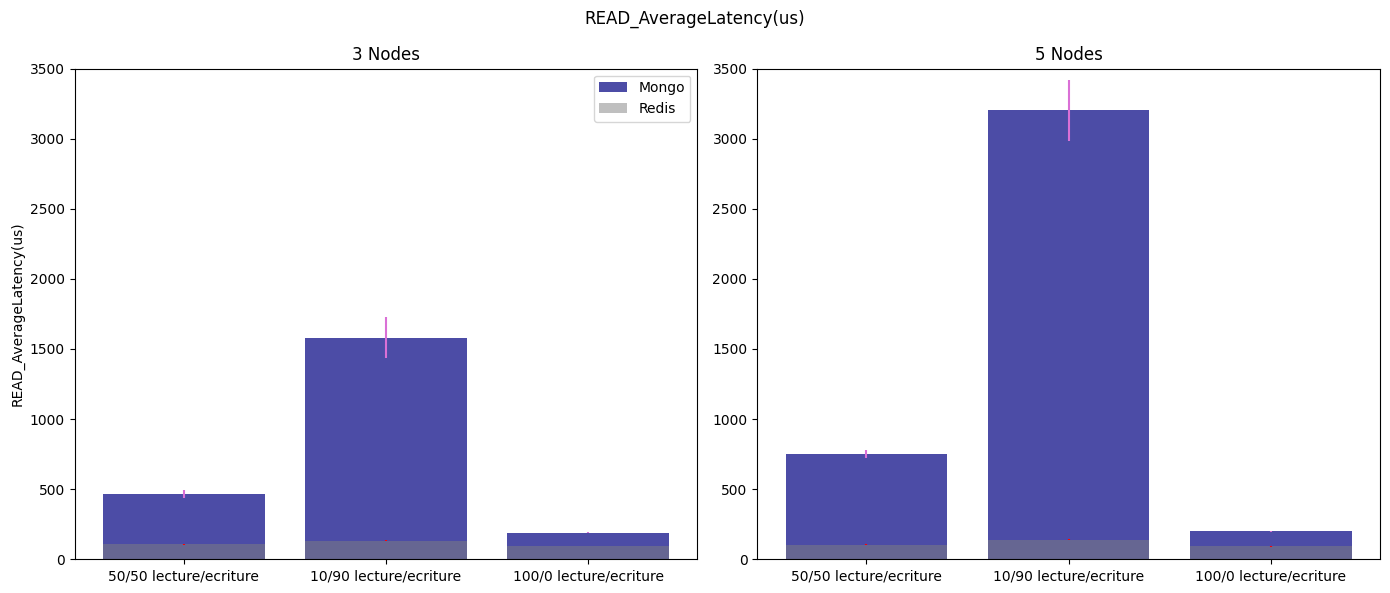

In [73]:
plot_figure(metric="READ_AverageLatency(us)", low_int='READ Latency Low', high_int='READ Latency High', filename="read-latency.png")

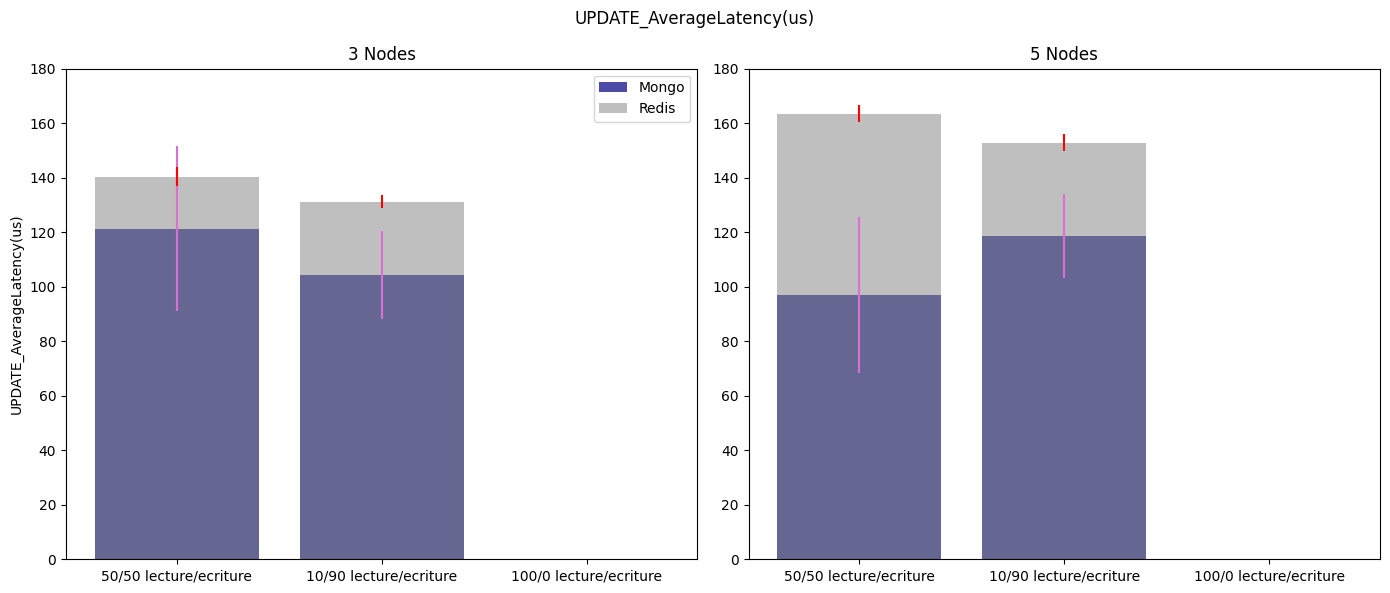

In [74]:
plot_figure(metric="UPDATE_AverageLatency(us)", low_int='UPDATE Latency Low', high_int='UPDATE Latency High', filename="update-latency.png")